# **CosmiCode-Internship**

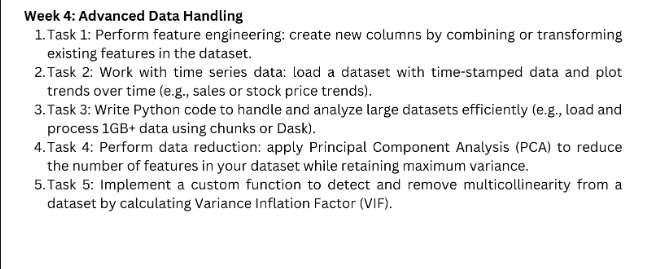